
**Competition Description**


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Features Description**
- PassengerId: unique id number to each passenger
- Survived: passenger survive(1) or died(0)
- Pclass: passenger class
- Name: name
- Sex: gender of passenger
- Age: age of passenger
- SibSp: number of siblings/spouses
- Parch: number of parents/children
- Ticket: ticket number
- Fare: amount of money spent on ticket
- Cabin: cabin category
- Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


In [ ]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df["Age"].isnull().sum()/len(df["Age"])*100

19.865319865319865

<Axes: ylabel='Frequency'>

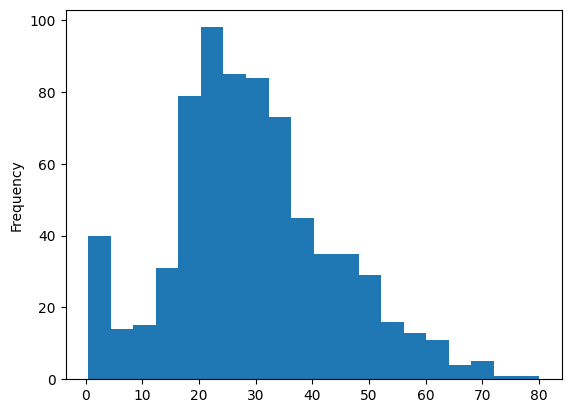

In [ ]:
df["Age"].plot(kind = 'hist',bins =20)

<Axes: ylabel='Density'>

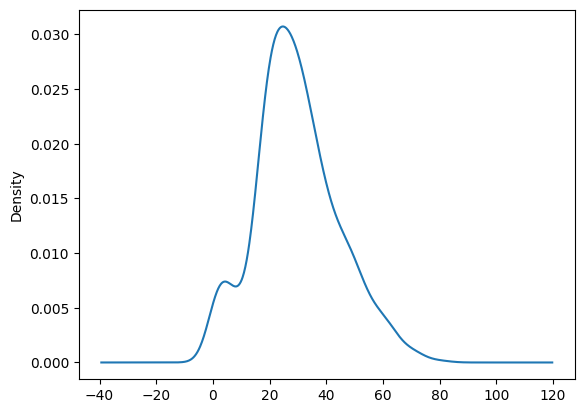

In [ ]:
df["Age"].plot(kind = 'kde')

<Axes: >

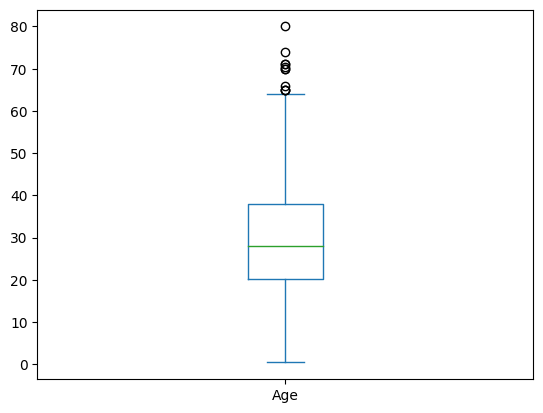

In [ ]:
df["Age"].plot(kind = 'box')

In [ ]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


### Age

**Conclusions**
- Age is almost normally distributed
- 20% values are missing
- There are some outliers

In [ ]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

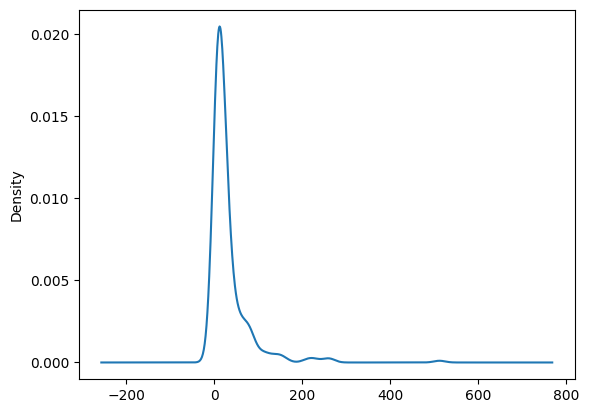

In [ ]:
df["Fare"].plot(kind = 'kde')

In [ ]:
df["Fare"].skew()

4.787316519674893

<Axes: >

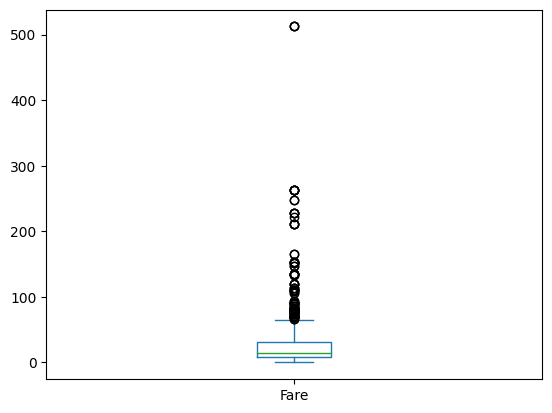

In [ ]:
df["Fare"].plot(kind = "box")

In [ ]:
df[df["Fare"]>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [ ]:
df["Fare"].isnull().sum()

0

### Fare

**Conclusions**
- The data is highly(positively) skewed
- some values in fare column acutally contain combained fare with family so some values are very high than individual fare value.
- we need to crete a new column on individual fare

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

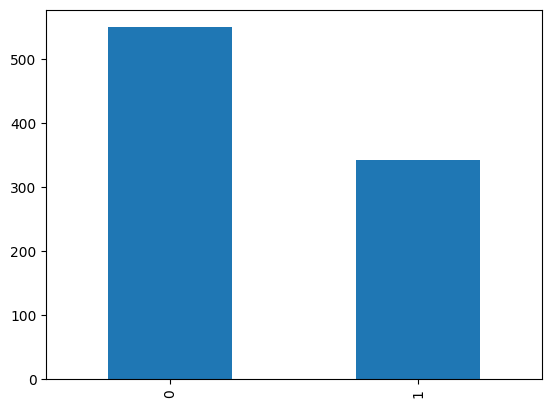

In [ ]:
df['Survived'].value_counts().plot(kind = "bar")

<Axes: ylabel='Survived'>

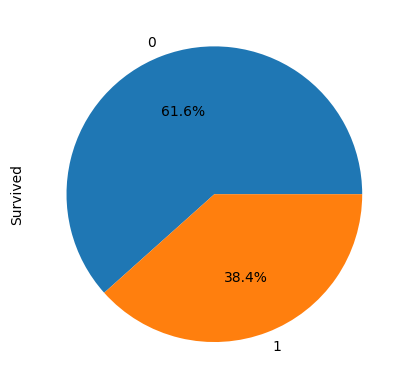

In [ ]:
df['Survived'].value_counts().plot(kind = "pie",autopct = "%0.1f%%")

In [ ]:
df['Survived'].isnull().sum()

0

### Fare

**conclusions**
- 342 Out of 891 people survived from this accident which is 38.4% of total passangers


In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

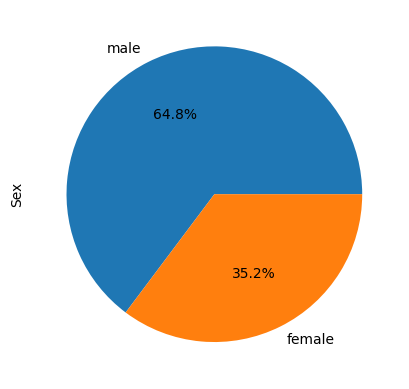

In [ ]:
df['Sex'].value_counts().plot(kind = "pie",autopct = "%0.1f%%")

### Sex

**conclusions**
- 64.8 % of total passangers are male and 35.2% of total passengers are female



In [ ]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Pclass

**conclusions**
- interesting to see there are more number of passangers in first class than second class.lets see we will compare fare with class



In [ ]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Parch , SibSp

**conclusions**
- create a new column called family_size from  parch+sibsp
-create a new column called is_alone


In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.55,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.25,D37,C
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.05,NaN,S


In [ ]:
#survived - pclass: lets see how many people died and survived in each three classes

pd.crosstab(df["Survived"],df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
np.round(pd.crosstab(df["Survived"],df["Pclass"],normalize = "columns")*100,2)

Pclass,1,2,3
Survived,,,
0,37.04,52.72,75.76
1,62.96,47.28,24.24


<Axes: xlabel='Pclass', ylabel='count'>

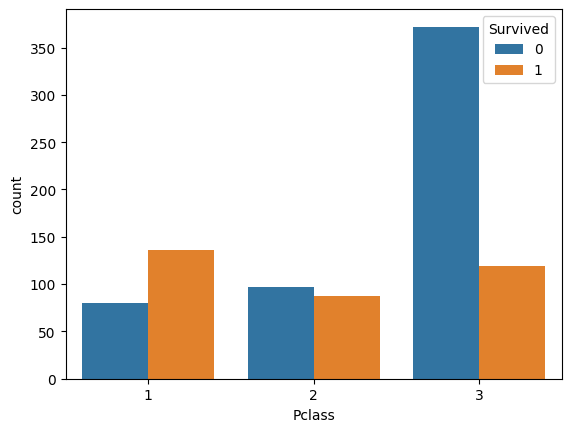

In [ ]:
sns.countplot(data = df,x = df["Pclass"],hue = "Survived")

In [ ]:
print(round(df [['Sex', 'Pclass','Survived']].\
                       groupby(['Pclass', 'Sex']).mean()*100,1))

               Survived
Pclass Sex             
1      female      96.8
       male        36.9
2      female      92.1
       male        15.7
3      female      50.0
       male        13.5


### Survived , Pclass

**conclusions**
- pclass 1 62.96% passengers are survived and 37.04% passangers are died.
- pclass 2 47.28% passengers are survived and 52.72% passangers are died.
- pclass 3 24.24% passengers are survived and 75.76% passangers are died.
- pclass 3 is most horrible class for passanger where probability to survive in the class is 0.24

Number of survivors in Pclass 3 = 24.24% of 491 total passangers
= 0.2424 * 491
≈ 119

Therefore, the probability of survival for a passenger traveling in Pclass 3 is:

Probability of survival = Number of survivors / Total number of passengers

Probability of survival = 119 / 491
≈ 0.24%

In [ ]:
#survived - sex: lets see how many men and women died
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
np.round(pd.crosstab(df["Survived"],df["Sex"],normalize = "columns")*100,2)

Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


<Axes: xlabel='Sex', ylabel='count'>

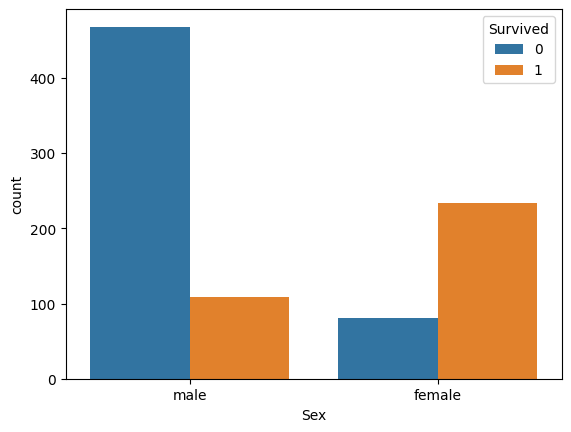

In [ ]:
sns.countplot(data = df,x = df["Sex"],hue = "Survived")

### Survived , Sex

**conclusions**
- 74.2% Female survived and 81.11% male died.

In [ ]:
#survived - Embarked: lets see how many men and women died and survived from each stop they travelled
np.round(pd.crosstab(df["Survived"],df["Embarked"],normalize = "columns")*100,2)

Embarked,C,Q,S
Survived,,,
0,44.64,61.04,66.3
1,55.36,38.96,33.7


<Axes: xlabel='Survived', ylabel='count'>

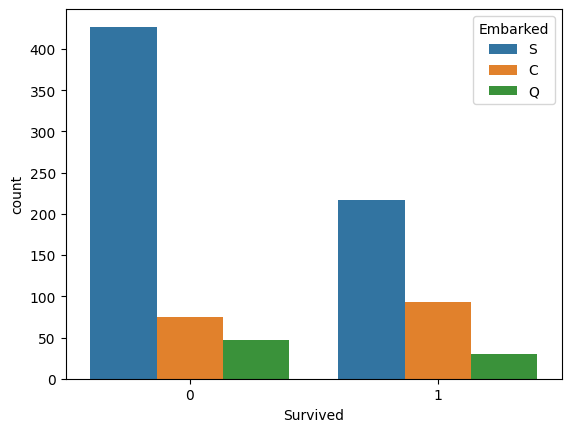

In [ ]:
sns.countplot(data = df,x = df["Survived"],hue = "Embarked")

-C = Cherbourg, Q = Queenstown, S = Southampton
- why c - Cherbourg have a higher percentage of people survived ?
- maybe 2 possible reasons either many passanger travelling pclass1 or many of them are ladies

In [ ]:
#pclass - Embarked: lets see how many men and women are travelled from -C = Cherbourg, Q = Queenstown, S = Southampton in each class
np.round(pd.crosstab(df["Pclass"],df["Embarked"],normalize = "columns")*100,2)

Embarked,C,Q,S
Pclass,,,
1,50.60,2.60,19.72
2,10.12,3.90,25.47
3,39.29,93.51,54.81


- we can see over 50.60% people from pclass 1 are started their journey from Cherbourg hence 55.36% people survived from Cherbourg

-  pclass 1 passangers have charged more money for fare


In [ ]:
##Lastly let us see if Embarked has any real relevant significance to survival
round(df[['Embarked', 'Sex', 'Pclass','Survived']].
                       groupby(['Embarked', 'Pclass', 'Sex']).mean()*100,2)

Survived
Embarked Pclass Sex             
C        1      female     97.67
                male       40.48
         2      female    100.00
                male       20.00
         3      female     65.22
                male       23.26
Q        1      female    100.00
                male        0.00
         2      female    100.00
                male        0.00
         3      female     72.73
                male        7.69
S        1      female     95.83
                male       35.44
         2      female     91.04
                male       15.46
         3      female     37.50
                male       12.83

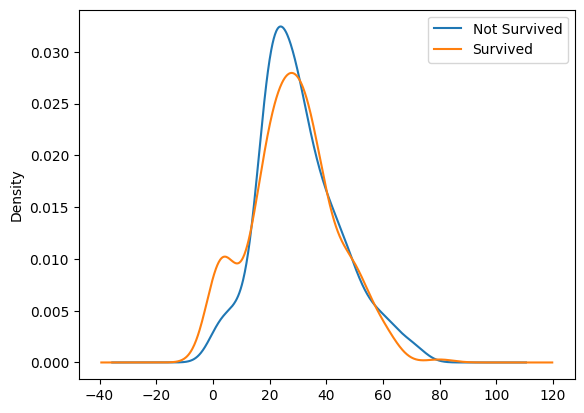

In [ ]:
# lets check age and survived relationship

df[df["Survived"] == 0]["Age"].plot(kind = "kde",label = "Not Survived")
df[df["Survived"] == 1]["Age"].plot(kind = "kde",label = "Survived")

plt.legend()
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

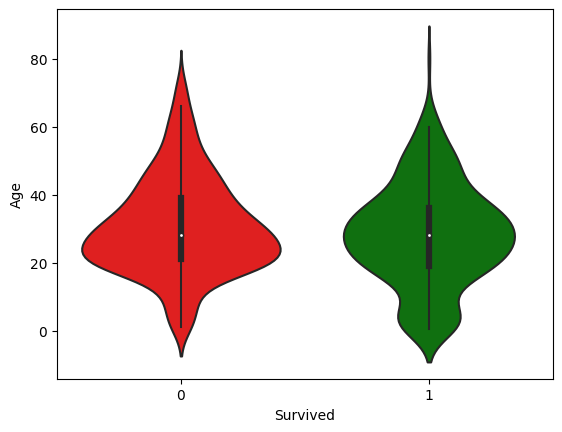

In [ ]:
sns.violinplot(x='Survived', y='Age', data=df, palette={0: "r", 1: "g"})

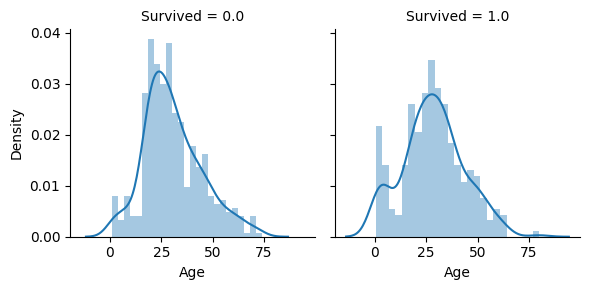

In [ ]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

### Survived , age

**conclusions**

-  survived depend on age?
Age in 1-10 kids probabilty to  survived more in numbers than passenger age group 25-40 tham  abve 55 less chances to survived
- also notic the orange curve is dominate at above 35 to 42 age just because pclass passangers there avg age is 38% and 62% passangers are survived
- large number of 20 years old did not survive,
most passengers are in 15-35 age range

In [ ]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

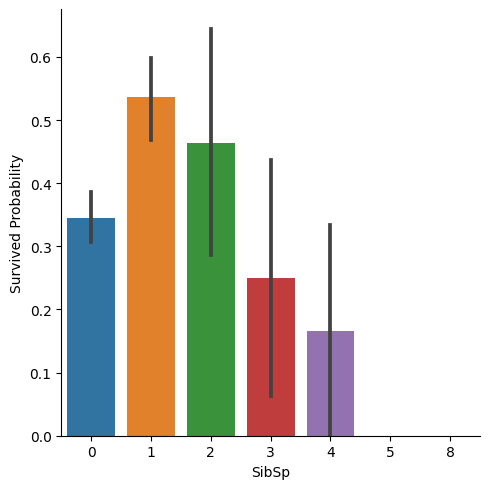

In [ ]:
g = sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

- Having a lot of SibSp have less chance to survive.
- if sibsp == 0 or 1 or 2, passenger has more chance to survive
- we can consider a new feature describing these categories.

In [ ]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

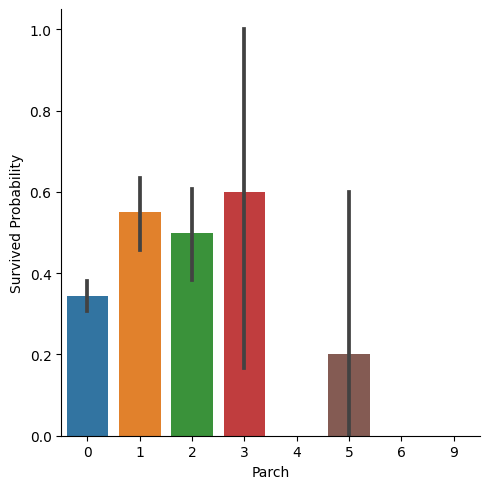

In [ ]:
g = sns.catplot(x = "Parch", y = "Survived", data = df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

- Sibsp and parch can be used for new feature extraction with th = 3
- small familes have more chance to survive.
- there is a std in survival of passenger with parch = 3

In [ ]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


- Eight Passengers travelling but they must 11 if we look carefully on passanger ID 160 then the sibsp and parch + he  = 11 people with total fare 69.55  we are going to merge test dataframe to see all




In [ ]:
df1 = pd.read_csv("/content/test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df =pd.concat([df,df1])

In [ ]:
df[df["Ticket"] == "CA. 2343"	]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df["Individual_fare"] = df["Fare"]/(df["SibSp"]+df["Parch"]+1)

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare
151,1043,NaN,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C,7.89580
205,206,0.0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,5.23125
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,41.08540


In [ ]:
df["Family_size"] = df["SibSp"]+df["Parch"]+1

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size
5,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,9.2250,1
83,975,NaN,3,"Demetri, Mr. Marinko",male,NaN,0,0,349238,7.8958,NaN,S,7.8958,1
838,839,1.0,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,56.4958,1


In [ ]:
# family_type

#1 - alone
#2-4 - small
#>5  - large

def get_family_size(num):
  if num == 1:
    return 'alone'

  elif num >1 and num< 4:
    return 'small'
  else:
    return 'large'
df["Family_type"] = df['Family_size'].apply(get_family_size)

In [ ]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type
316,1208,NaN,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,B78,C,73.2604,2,small
203,204,0.0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,7.2250,1,alone
523,524,1.0,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,28.9896,2,small


In [ ]:
df["Family_size"].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

In [ ]:
np.round(pd.crosstab(df["Survived"],df["Family_size"],normalize = "columns")*100,2)

Family_size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,69.65,44.72,42.16,27.59,80.0,86.36,66.67,100.0,100.0
1.0,30.35,55.28,57.84,72.41,20.0,13.64,33.33,0.0,0.0


- Having a lot of SibSp have less chance to survive.
- if sibsp == 0 or 1 or 2, passenger has more chance to survive

In [ ]:
df["Family_type"].value_counts()

alone    790
small    394
large    125
Name: Family_type, dtype: int64

In [ ]:
np.round(pd.crosstab(df["Survived"],df["Family_type"],normalize = "columns")*100,2)

Family_type,alone,large,small
Survived,,,
0.0,69.65,65.93,43.73
1.0,30.35,34.07,56.27


- Passenger who travelled alone then 69.65% are died
- Passenger who travelled with 2 to 4 sibling spouse (including him/her) then 56.27% are Survived

In [ ]:

round(df[['Family_size', 'Family_type','Sex','Survived']].
                       groupby(['Family_size', 'Family_type', 'Sex',]).mean()*100,2)

Survived
Family_size Family_type Sex             
1           alone       female     78.57
                        male       15.57
2           small       female     81.61
                        male       24.32
3           small       female     77.55
                        male       39.62
4           large       female     84.21
                        male       50.00
5           large       female     25.00
                        male        0.00
6           large       female     37.50
                        male        0.00
7           large       female     37.50
                        male       25.00
8           large       female      0.00
                        male        0.00
11          large       female      0.00
                        male        0.00

In [ ]:
## Feature Engineering -> working with Name column

In [ ]:
df["surname"] = df["Name"].str.split(',').str.get(0)

In [ ]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,surname
167,1059,NaN,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,NaN,S,6.875,5,large,Ford
349,1241,NaN,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.000,NaN,S,21.000,1,alone,Walcroft
61,953,NaN,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.500,NaN,S,13.500,1,alone,McCrae
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,6.875,5,large,Ford


In [ ]:
df["surname"].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: surname, Length: 875, dtype: int64

In [ ]:
df[df["surname"] == 'Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,surname
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,6.322727,11,large,Sage


In [ ]:
#df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_fare,Family_size,Family_type,surname,title
208,209,1.0,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,7.7500,1,alone,Carr,Miss.
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.7111,3,small,Johnson,Mrs.
287,288,0.0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,7.8958,1,alone,Naidenoff,Mr.
714,715,0.0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S,13.0000,1,alone,Greenberg,Mr.


In [ ]:
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

Cabin

- **A Deck**, also called the promenade deck,  It was reserved exclusively for First Class passengers and contained First Class cabins

- **B Deck,** the bridge deck, More First Class passenger accommodations were located here with six palatial staterooms (cabins) featuring their own private promenades

- **C Deck**, the shelter deck, was the highest deck to run uninterrupted from stem to stern. It included both well decks; the aft one served as part of the Third Class promenade. Crew cabins were housed below the forecastle and Third Class public rooms were housed below the poop deck. In between were the majority of First Class cabins and the Second Class library.

- **D Deck,** the saloon deck, was dominated by three large public rooms—the First Class reception room, the First Class dining saloon and the Second Class dining saloon. An open space was provided for Third Class passengers. First, Second and Third Class passengers had cabins on this deck

- **E Deck**, the upper deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers.

- **F Deck**, the middle deck, was the last complete deck, and mainly accommodated Second and Third Class passengers and several departments of the crew. The Third Class dining saloon was located here, as were the swimming pool, Turkish bath and kennels.

- **G Deck**, the lower deck, was the lowest complete deck that carried passengers, and had the lowest portholes, just above the waterline.

In [ ]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100

77.46371275783041

In [ ]:
#df['Cabin'].fillna('M',inplace = True)

In [ ]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [ ]:
df['Deck'] = df["Cabin"].str.get(0)

In [ ]:
df['Deck'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

In [ ]:
pd.crosstab(df['Deck'],df["Pclass"])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
T,1,0,0


In [ ]:
pd.crosstab(df['Survived'],df["Deck"])

Deck,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,1
1.0,7,35,35,25,24,8,2,0


In [ ]:
np.round(pd.crosstab(df['Survived'],df["Deck"],normalize = 'columns')*100,2)

Deck,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0.0,53.33,25.53,40.68,24.24,25.0,38.46,50.0,100.0
1.0,46.67,74.47,59.32,75.76,75.0,61.54,50.0,0.0


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_fare,Family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
Individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
Family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


- Survived with pclass : as the passenger class is not first class the chances to survied is less
- Survived with age : as age is inreases the survival chance is very low

<Axes: >

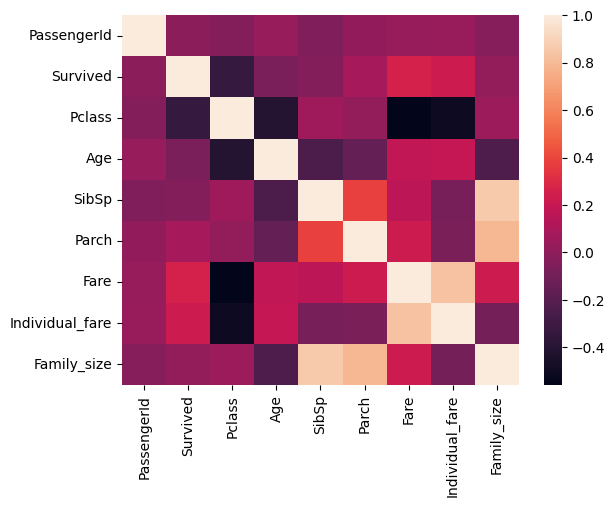

In [ ]:
sns.heatmap(df.corr())